## 一、UCB和汤普森算法比较

## ![avatar](./1.png)

## 二、导入标准库

In [1]:
# Importing the libraries 导入库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 使图像能够调整
%matplotlib notebook 
#中文字体显示  
plt.rc('font', family='SimHei', size=8)

## 三、导入数据

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv') # 数据表示虚拟环境，模拟我将投放哪些广告
dataset

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


## 四、汤普森算法在多臂老虎机中的实现过程

## ![avatar](./2.png)

## 五、实现

In [8]:
import random
N = 10000                    # 1000个用户
d = 10                       # 10个广告
ads_selected = []           # 广告选择
numbers_of_rewards_1 = [0] * d # 广告i奖励1的总和
numbers_of_rewards_0 = [0] * d # 广告i奖励0的总和
total_reward = 0            # 总奖励
for n in range(0, N):        # 每个用户循环
    ad = 0
    max_random = 0
    for i in range(0, d):   # 第i个广告
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1) # beta分布
        if random_beta > max_random:  # 寻找最大随机量，最大随机量对应的广告为我们选择投放的广告
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]  # 获得奖励
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward
print(total_reward)

2625


## 六、画图展示

<IPython.core.display.Javascript object>


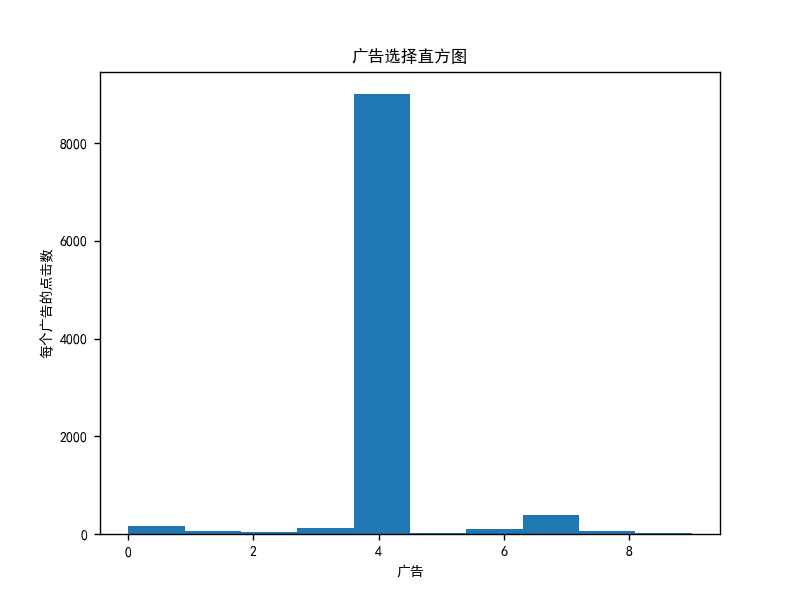

In [5]:
# 画图
plt.hist(ads_selected)
plt.title(u'广告选择直方图')
plt.xlabel(u'广告')
plt.ylabel(u'每个广告的点击数')
plt.show()

### 看来还是汤普森更加NB。随机生成的总奖励1282（见上一个专题），置信区间上界算法总奖励2358（见上一个专题），汤普森的总奖励2625

## 七、项目地址

### https://coding.net/u/RuoYun/p/Python-of-machine-learning/git/tree/master/00%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0/5.%E8%BF%9B%E9%98%B6%E7%AE%97%E6%B3%95/1.%E5%BC%BA%E5%8C%96%E5%AD%A6%E4%B9%A0/2.%E6%B1%A4%E6%99%AE%E6%A3%AE%E7%AE%97%E6%B3%95?public=true